<a href="https://colab.research.google.com/github/subhaganesh/deep_learning_repo/blob/main/02_neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

classification problems:

* binary classification
* multiclass classification
* multilabel classification


# creating data to view and fit

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x ,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42 )


In [ ]:
#check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check out labels
y[:5]

array([1, 1, 1, 1, 0])

our data is little hard to understand rightnow... lets visualize it!

In [ ]:
circles=pd.DataFrame({'x0':x[:,0],'x1':x[:,1],'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

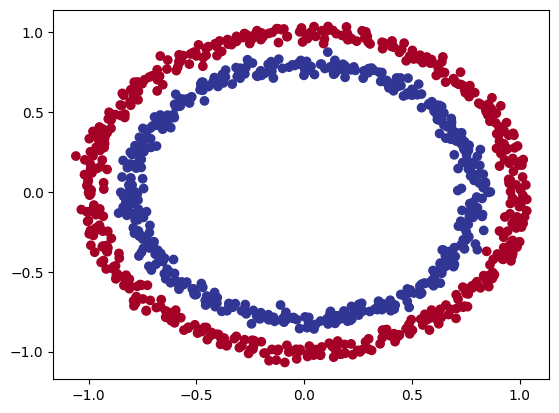

In [ ]:
# visualize with a plot
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

website:tensorflow playground

# input and output shapes

In [ ]:
#check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#how many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
#view the first examples of features and labels
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
x.dtype,y.dtype

(dtype('float64'), dtype('int64'))

# steps in modeling

1. create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate..

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD() ,
             metrics=['accuracy'])

model.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 3.4895 - accuracy: 0.4610
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7389 - accuracy: 0.5310
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5160
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5090


[0.693522572517395, 0.5090000033378601]

In [ ]:
# let's try and improve our model by training for longer...
model.fit(x,y,epochs=200,verbose=0)
model.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

since we're working on a binary classification problem and our model is getting around 50% accuracy.. it,s performing as if it's guessing.

so let's step things up a notch and add an extra layer.

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD() ,
             metrics=['accuracy'])

model.fit(x,y,epochs=100,verbose=0)

In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

# improving our model

let's look into our bag of tricks to see how we can improve our model

1. create a model- we might to add more layers or increase the number of hidden units  within a layer.

2. compiling a model- here we might to  choose a different optimization function such as adam  instead of SGD.

3. fitting a model- fit our model with more epochs


In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam() ,
             metrics=['accuracy'])

model.fit(x,y,epochs=200,verbose=0)

In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4860


[0.6936060190200806, 0.4860000014305115]

In [ ]:
model.predict(x)

32/32 [==============================] - 0s 1ms/step


array([[0.4788842 ],
       [0.5073142 ],
       [0.5085946 ],
       [0.5042226 ],
       [0.4767936 ],
       [0.50575376],
       [0.49771842],
       [0.47795317],
       [0.48927066],
       [0.5013507 ],
       [0.50013834],
       [0.48682287],
       [0.49991706],
       [0.47522697],
       [0.4759651 ],
       [0.48258474],
       [0.5072272 ],
       [0.48396838],
       [0.5066933 ],
       [0.4986893 ],
       [0.48289508],
       [0.50860995],
       [0.4849764 ],
       [0.47949785],
       [0.51242584],
       [0.5111159 ],
       [0.49321848],
       [0.47474587],
       [0.4813174 ],
       [0.47574395],
       [0.49127132],
       [0.5031138 ],
       [0.49715298],
       [0.47250223],
       [0.48577425],
       [0.5117606 ],
       [0.5066958 ],
       [0.48822355],
       [0.4813189 ],
       [0.48199508],
       [0.49762103],
       [0.4914693 ],
       [0.5005479 ],
       [0.47397247],
       [0.5035453 ],
       [0.50667715],
       [0.47716814],
       [0.492

# plot decision boundary function to view our model

 to visuvalize our model predictions , let's create a function 'plot_decision_boundary' this function will:

* take in a trained model, features (x) and labels (y)

* create a meshgrid of the different x values

* make predictions across the meshgrid

* plot the predictions as well as a line between zones (where each unique class falls)

 Resource for the bottom code
    This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/m

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, x, y):
  """
  plots the decision boundary created by a model predicting on x.
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:,0].min() - 0.1,  x[:,0].max()  + 0.1
  y_min, y_max = x[:,0].min() - 0.1,  x[:,0].max()  + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  #create x values (we're going to make predictions on these)
  x_in =np.c_[xx.ravel(), yy.ravel()]

  #make predictions
  y_pred=model.predict(x_in)

  #check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")

    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = x[:,0].min() - 0.1,  x[:,0].max()  + 0.1
y_min, y_max = x[:,0].min() - 0.1,  x[:,0].max()  + 0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1337117525463374)

Now we've got a function to plot our model's decision boundary (the cut off point its making between red and blue dots), let's try it out.



313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


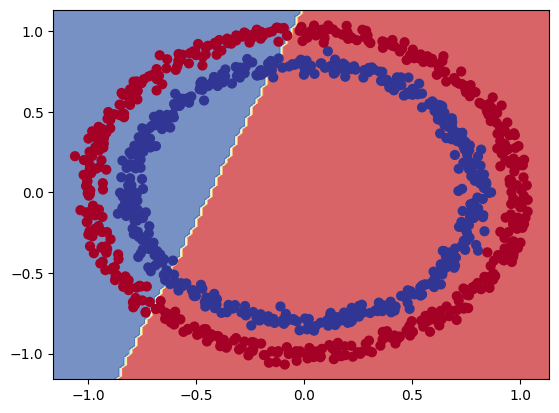

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model, x, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create some regression data
x_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5) # y= x +100

# Split it into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model.fit(tf.expand_dims(x_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

we compiled our model for a binary classification problem
but we are now working on a regression problem, let's change the model to suit our data

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model.fit(tf.expand_dims(x_reg_train, axis=-1),
            y_reg_train,
            epochs=100,verbose=0)


2/2 [==============================] - 0s 6ms/step


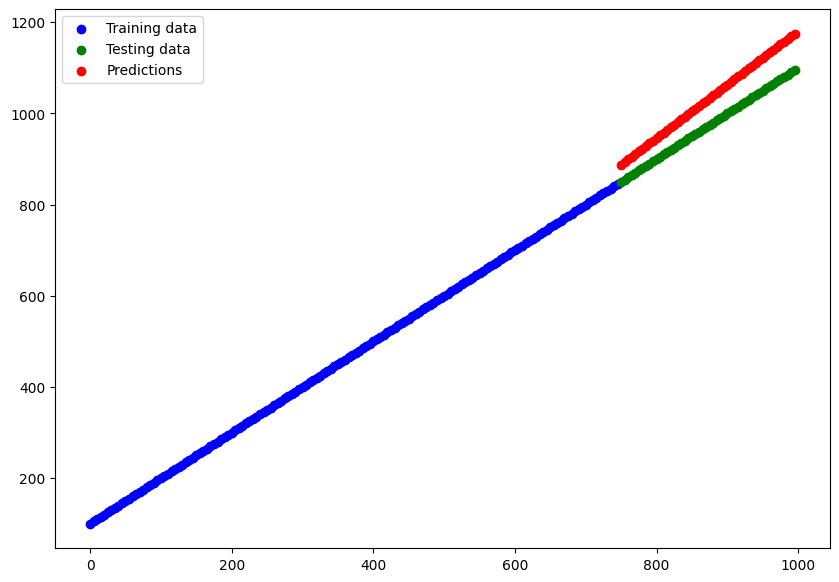

In [ ]:
# Make predictions with our trained model
y_reg_preds = model.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# The missing piece (non-linearity)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1= tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_1.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2765 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1794 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1049 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0129 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9133 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7702 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6721 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5221 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3341 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2455 - accuracy: 0.4730
Epoch 11/

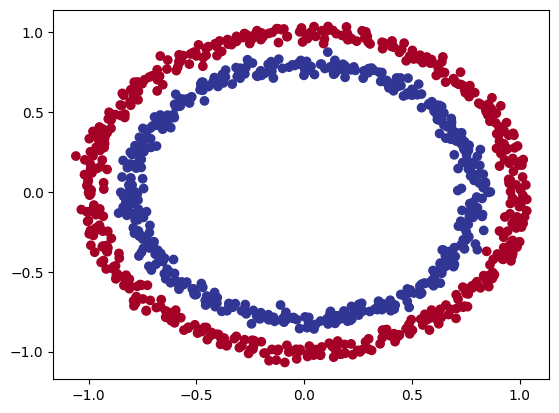

In [ ]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


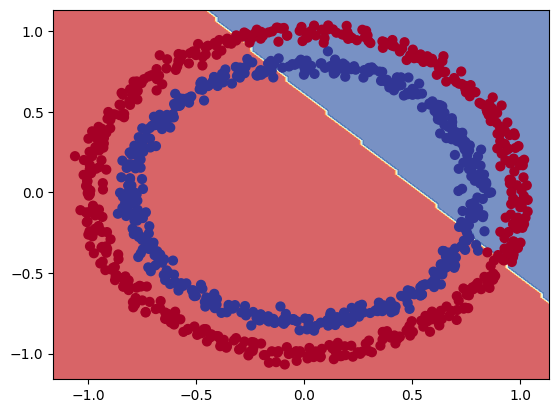

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_1, x, y)

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the activation parameter in on of our layers.

lets try build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_2.fit(x, y, epochs=100,verbose=0)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_3.fit(x, y, epochs=100,verbose=0)

In [ ]:
model_3.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


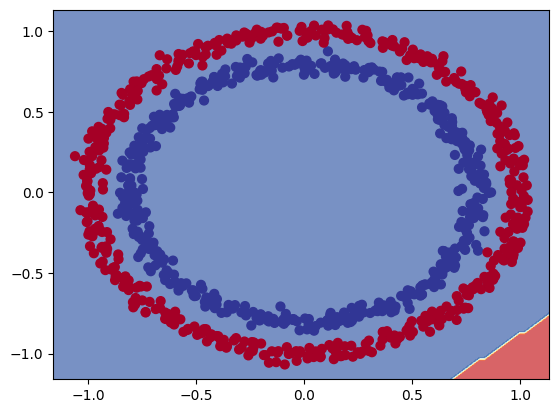

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_3, x, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(x, y, epochs=200,verbose=0)

In [ ]:
# Evaluate our model
model_4.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9920


[0.08032606542110443, 0.9919999837875366]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


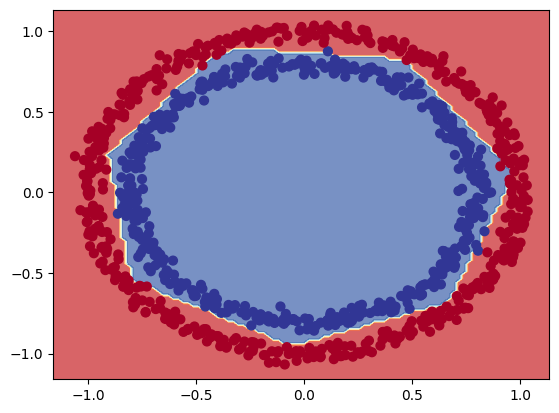

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_4, x, y)

our model_4 separate the red and blue dots with 99 % accuracy

---
---

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

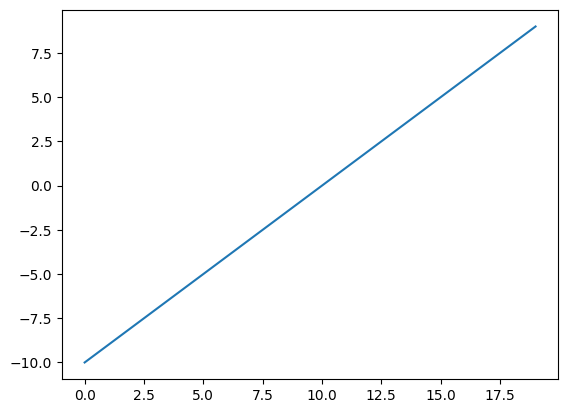

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

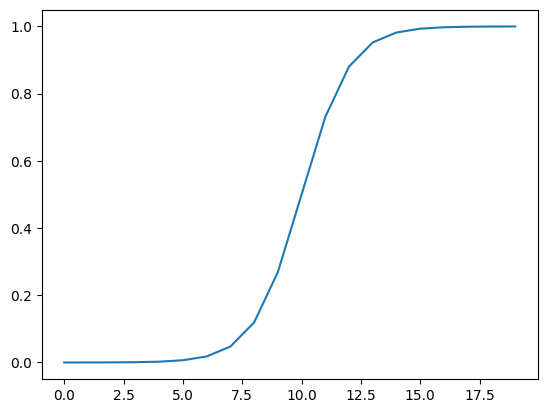

In [ ]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

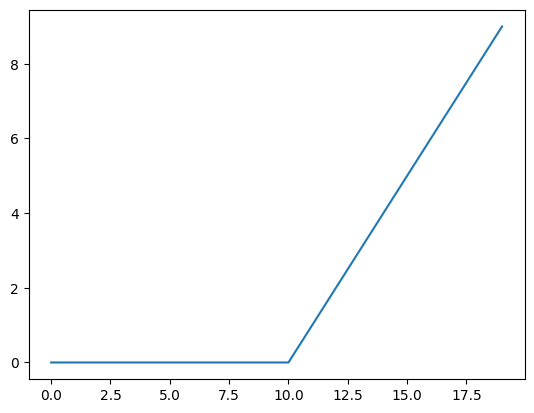

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [ ]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Resource: **machine learning cheatcheat activation functions**

# Evaluating and improving our classification model

In [ ]:
# How many examples are in the whole dataset?
len(x), len(y)

(1000, 1000)

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Split data into train and test sets
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
x_train.shape, x_test.shape,y_train.shape,y_test.shape# 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2), (800,), (200,))

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5150
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5275
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6037
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.5925
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.7387
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.8050
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.8313
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.9150
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3847 - accuracy: 0.9563
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_5.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9950
Model loss on the test set: 0.06016937270760536
Model accuracy on the test set: 99.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


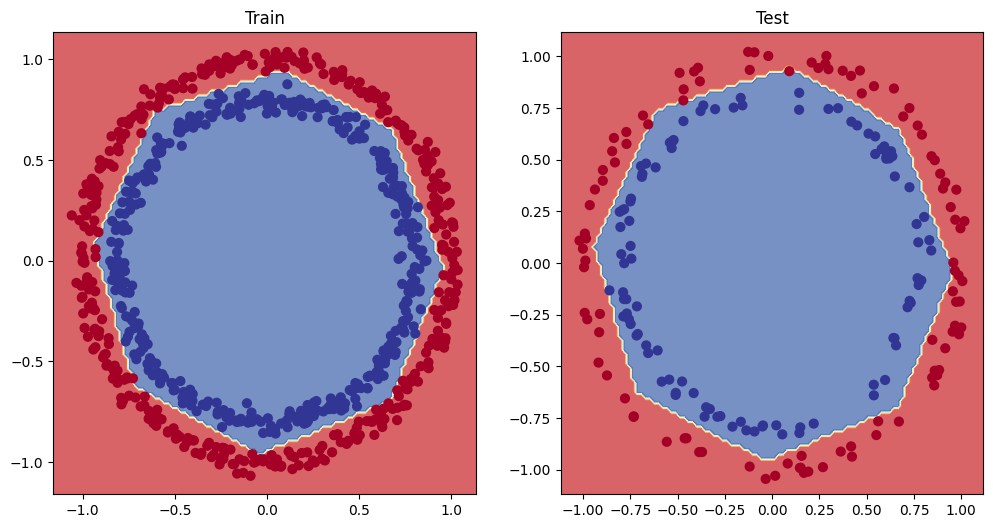

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, x=x_test, y=y_test)
plt.show()

In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.690146,0.51500
1,0.684198,0.52750
2,0.676381,0.55375
3,0.664370,0.60375
4,0.647522,0.59250
5,0.618574,0.73875
6,0.576336,0.80500
7,0.532746,0.83125
8,0.461755,0.91500
9,0.384719,0.95625


In [ ]:
history.history

{'loss': [0.6901463866233826,
  0.6841975450515747,
  0.6763808727264404,
  0.6643701195716858,
  0.6475221514701843,
  0.6185736656188965,
  0.5763358473777771,
  0.5327455997467041,
  0.4617554843425751,
  0.38471880555152893,
  0.31296610832214355,
  0.25127580761909485,
  0.21312421560287476,
  0.1845223754644394,
  0.1541154831647873,
  0.1409769058227539,
  0.12258641421794891,
  0.10677117109298706,
  0.09700290858745575,
  0.09596902132034302,
  0.08369556069374084,
  0.07585008442401886,
  0.0706770196557045,
  0.06794357299804688,
  0.06367513537406921],
 'accuracy': [0.5149999856948853,
  0.5274999737739563,
  0.5537499785423279,
  0.6037499904632568,
  0.5924999713897705,
  0.7387499809265137,
  0.8050000071525574,
  0.831250011920929,
  0.9150000214576721,
  0.956250011920929,
  0.981249988079071,
  0.9800000190734863,
  0.987500011920929,
  0.987500011920929,
  0.9862499833106995,
  0.9912499785423279,
  0.9925000071525574,
  0.9975000023841858,
  0.9912499785423279,
  0.

Text(0.5, 1.0, 'Model_8 training curves')

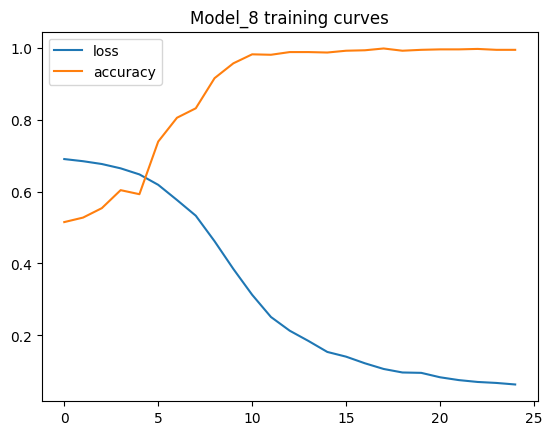

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

# Finding the best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_6.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7082 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.4638 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4375 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

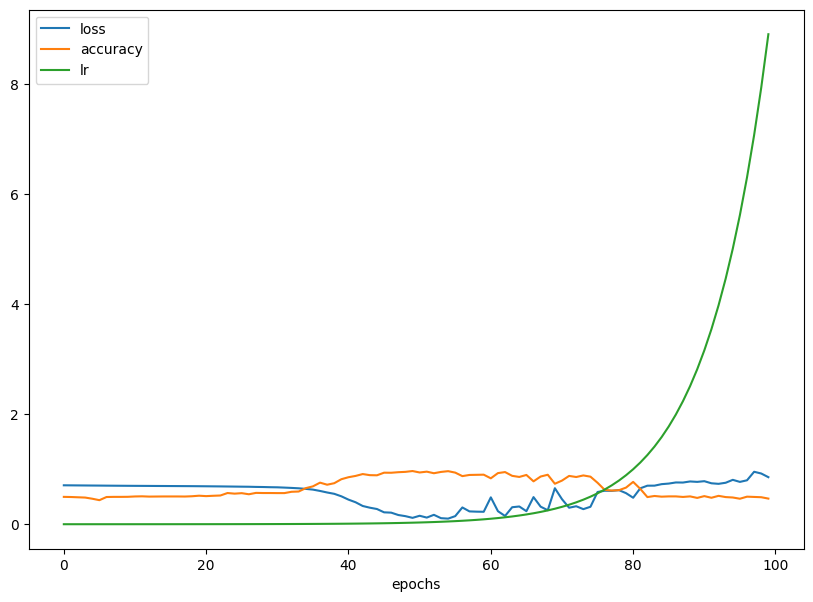

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

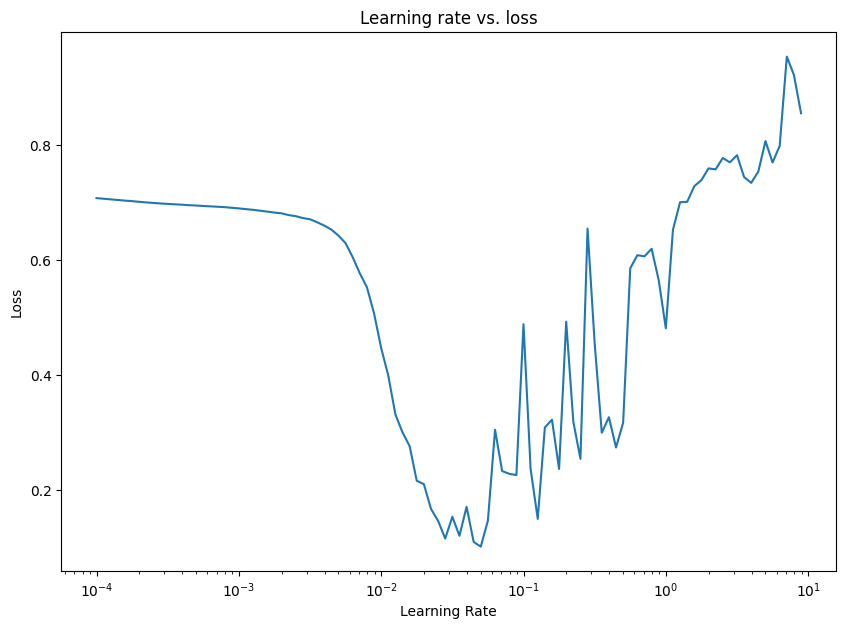

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Example of other typical learning rate values
10**1, 10**0, 10**-1, 10**-2, 10**-3, 1e-4,    10 ** (np.arange(100)/20)

(10,
 1,
 0.1,
 0.01,
 0.001,
 0.0001,
 array([1.00000000e+00, 1.12201845e+00, 1.25892541e+00, 1.41253754e+00,
        1.58489319e+00, 1.77827941e+00, 1.99526231e+00, 2.23872114e+00,
        2.51188643e+00, 2.81838293e+00, 3.16227766e+00, 3.54813389e+00,
        3.98107171e+00, 4.46683592e+00, 5.01187234e+00, 5.62341325e+00,
        6.30957344e+00, 7.07945784e+00, 7.94328235e+00, 8.91250938e+00,
        1.00000000e+01, 1.12201845e+01, 1.25892541e+01, 1.41253754e+01,
        1.58489319e+01, 1.77827941e+01, 1.99526231e+01, 2.23872114e+01,
        2.51188643e+01, 2.81838293e+01, 3.16227766e+01, 3.54813389e+01,
        3.98107171e+01, 4.46683592e+01, 5.01187234e+01, 5.62341325e+01,
        6.30957344e+01, 7.07945784e+01, 7.94328235e+01, 8.91250938e+01,
        1.00000000e+02, 1.12201845e+02, 1.25892541e+02, 1.41253754e+02,
        1.58489319e+02, 1.77827941e+02, 1.99526231e+02, 2.23872114e+02,
        2.51188643e+02, 2.81838293e+02, 3.16227766e+02, 3.54813389e+02,
        3.98107171e+02, 4

In [ ]:
10**-2 - 10**-1

-0.09000000000000001

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_7.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4812
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5800
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6550
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7412
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.8100
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.9475
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.9650
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1857 - accuracy: 0.9737
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9937
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model on the test dataset
model_7.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9800


[0.06395361572504044, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


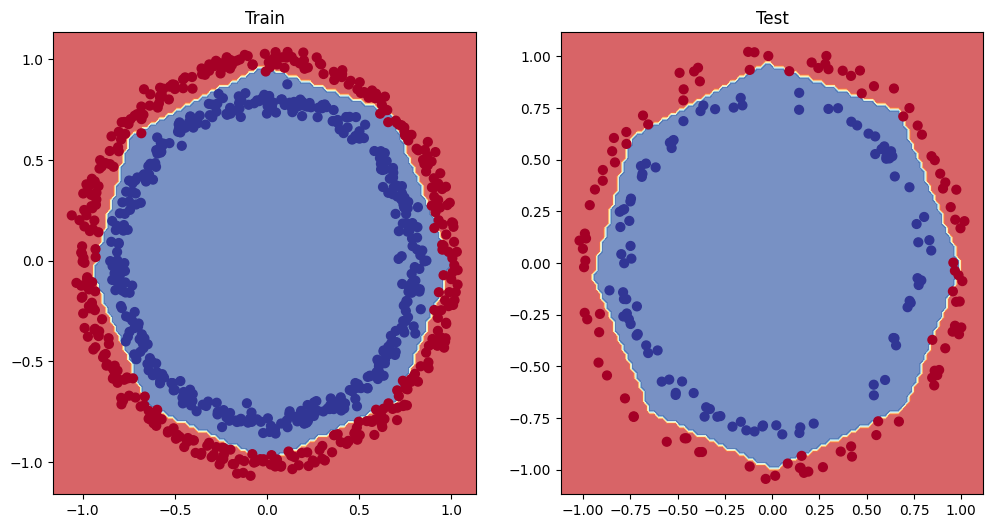

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, x=x_test, y=y_test)
plt.show()

# More classification evaluation methods

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_7.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9800
Model loss on test set: 0.06395361572504044
Model accuracy on test set: 98.00%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_7.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
# View the first 10 predictions
y_preds[:10]

array([[0.9983873 ],
       [0.99917245],
       [0.99907196],
       [0.9972791 ],
       [0.21521066],
       [0.00125904],
       [0.99763066],
       [0.00133324],
       [0.9981651 ],
       [0.02604816]], dtype=float32)

In [ ]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]])

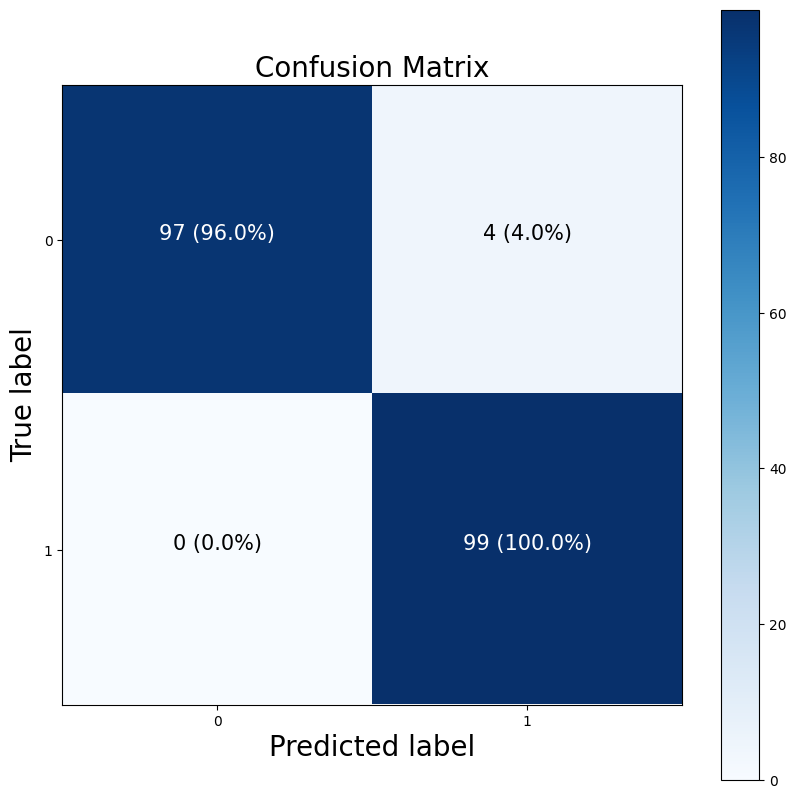

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# Working with a larger example (multiclass classification)

when you have more than two classes as an option ,it's known as **multi-class classification**

* This means if you have 3 different classes ,it's multi-class classification

* It also means if you have 100 different classes ,it's multi-class classification

to practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into  training and test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#show the first training examples
print(f'training sample:\n{train_data[0]}\n')
print(f'training label:\n{train_labels[0]}\n')

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

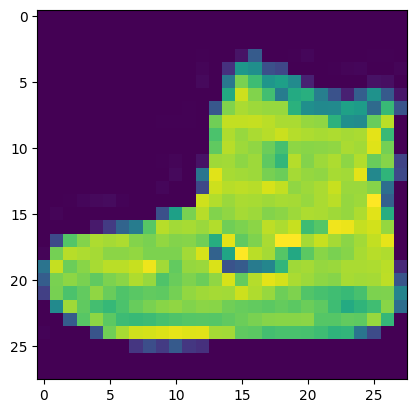

In [ ]:
#plot the single sample
plt.imshow(train_data[0])

In [ ]:
train_labels[0]

9

In [ ]:
# create a small list so we can index onto our training labels so they're human-readable
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# how many classes are there (this'll be our output shape)?
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

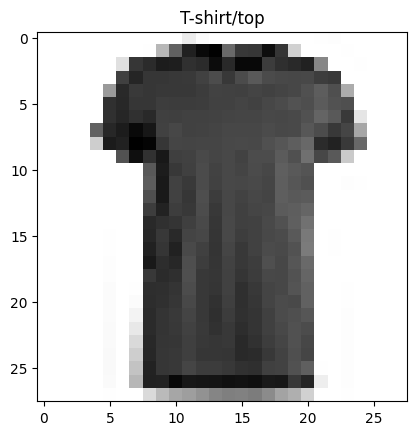

In [ ]:
#plot an example image and it's label
index_of_choice=17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

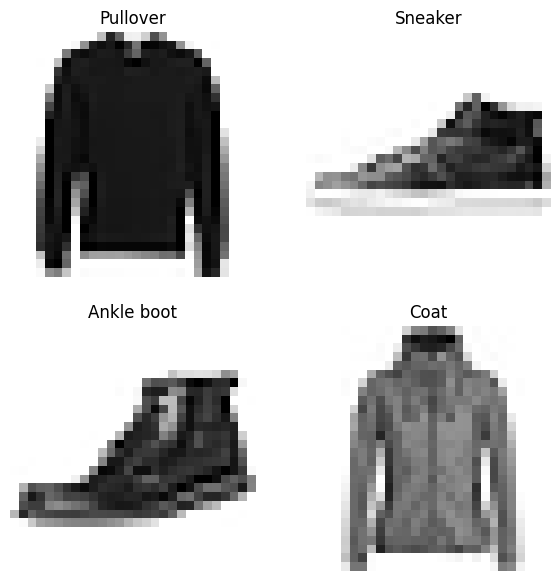

In [ ]:
#plot multiple random images of fashion mnist
import random
plt.figure (figsize=(7,7))
for i in range(4):
  ax= plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi-class classification model

for our multi_class classififcation model, we can use a similar architecture to our binary classifiers, however ,we're going to have to tweak a few things:
* input shape = 28*28(the shape of the image)
* output shape = 10 (one per class)
* loss function= tf.keras.losses.categoricalcrossentropy()
  * if your labels are one hot encoded use categoricalcrossentropy

  * if it was in integer format use sparsecategoricalcrossentropy
* output layer activation = softmax (not sigmoid)

In [ ]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
# our data needs to be flattened from ( 28*28) to 784
flatten_model= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

*  **Two important points**

* we want to flatten the input layer to change the shape of 28 *28 to 784
* if you want to provide labels as integers, use sparsecategoricalcrossentropy instead of CategoricalCrossentropy in loss function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_8= tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_8.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3554 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2899 - accuracy: 0.1055 - val_loss: 2.2949 - val_accuracy: 0.1038
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2358 - accuracy: 0.1296 - val_loss: 2.1069 - val_accuracy: 0.1562
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8383 - accuracy: 0.2168 - val_loss: 1.7626 - val_accuracy: 0.2392
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6937 - accuracy: 0.2639 - val_loss: 1.7368 - val_accuracy: 0.2437
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6430 - accuracy: 0.2718 - val_loss: 1.6333 - val_accuracy: 0.2664
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6279 - accuracy: 0.2773 - val_loss: 1.6541 - val_accuracy:

# Alternate change output labels to one hot encoded

#tf.one_hot(train_labels[:10], depth=10)

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8= tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_8.fit(train_data,
                                tf.one_hot(train_labels, depth=10)
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels,depth=10)))


# improving performance with normalization


In [ ]:
# check the model summary
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# check the min and max value of the training data
train_data.min(), train_data.max()

(0, 255)

neural network prefer data to be scaled (or normalized),this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

In [ ]:
# we can get our training and testing data between 0 and 1 by dividing by the maximum

train_data_norm = train_data/255.0
test_data_norm =test_data/255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# now our data is normalized lets build a model to find pattern in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8= tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_8.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3600 - accuracy: 0.4837 - val_loss: 1.0540 - val_accuracy: 0.5976
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9663 - accuracy: 0.6225 - val_loss: 0.9414 - val_accuracy: 0.6385
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8958 - accuracy: 0.6578 - val_loss: 0.8873 - val_accuracy: 0.6632
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8430 - accuracy: 0.6796 - val_loss: 0.8465 - val_accuracy: 0.6855
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8088 - accuracy: 0.6983 - val_loss: 0.8460 - val_accuracy: 0.6893
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7862 - accuracy: 0.7119 - val_loss: 0.8106 - val_accuracy: 0.7091
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7718 - accuracy: 0.7191 - val_loss: 0.8100 - val_accuracy:

we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

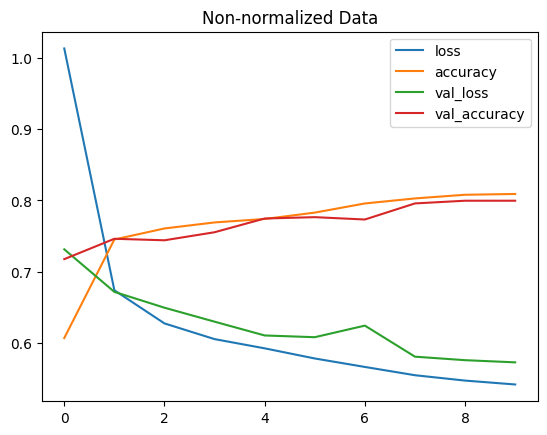

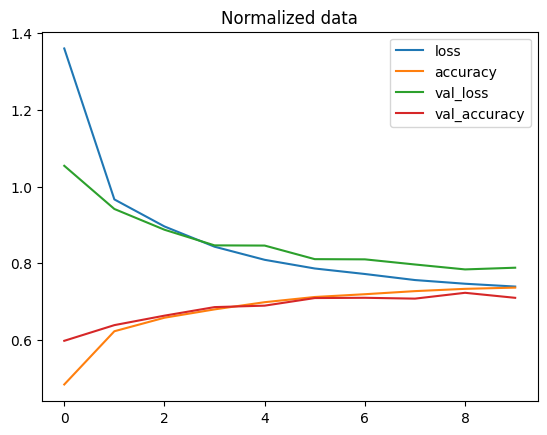

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

# finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_9.fit(train_data_norm,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1978 - accuracy: 0.5511 - val_loss: 0.8524 - val_accuracy: 0.6709 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7868 - accuracy: 0.6966 - val_loss: 0.7736 - val_accuracy: 0.7108 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7188 - accuracy: 0.7329 - val_loss: 0.7186 - val_accuracy: 0.7427 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6633 - accuracy: 0.7642 - val_loss: 0.6618 - val_accuracy: 0.7647 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6302 - accuracy: 0.7750 - val_loss: 0.6470 - val_accuracy: 0.7706 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6056 - accuracy: 0.7832 - val_loss: 0.6494 - val_accuracy: 0.7639 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

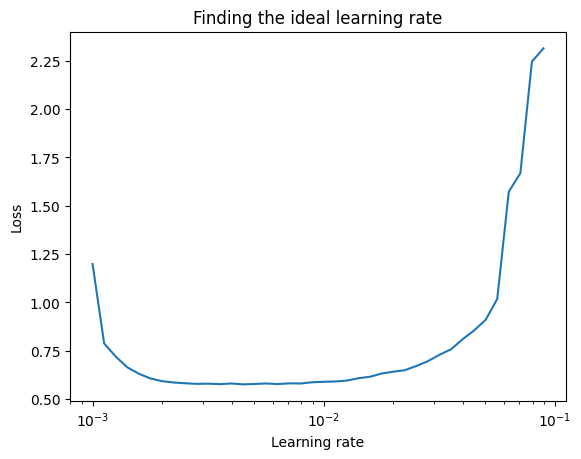

In [ ]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
10**-3

0.001

n this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.



In [ ]:
#Let's refit a model using the ideal learning rate.

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6559 - accuracy: 0.3608 - val_loss: 1.4153 - val_accuracy: 0.4445
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3578 - accuracy: 0.4650 - val_loss: 1.2982 - val_accuracy: 0.5319
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1925 - accuracy: 0.5490 - val_loss: 1.1387 - val_accuracy: 0.5590
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0955 - accuracy: 0.5578 - val_loss: 1.0978 - val_accuracy: 0.5653
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0520 - accuracy: 0.5550 - val_loss: 1.0632 - val_accuracy: 0.5710
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0224 - accuracy: 0.5745 - val_loss: 1.0375 - val_accuracy: 0.5783
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0065 - accuracy: 0.5847 - val_loss: 1.0292 - val_accuracy:

# Evaluate multi-class classification model

* evaluate it performance using confusion matrix
* assess some of its prediction using visuvalization
* improve its results by  training it for longer using more epochs
* save and export it for further application

# **create a confusion matrix function**

In [ ]:
# create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize = (10, 10), text_size=15 ):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)


  #set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# make some predictions with our model
y_probs= model_10.predict(test_data_norm)

#view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.25305763e-11, 1.51731952e-18, 1.33225744e-12, 6.02255983e-04,
        3.07794176e-06, 3.34995362e-04, 3.14021781e-06, 6.04272000e-02,
        3.70062113e-01, 5.68567157e-01],
       [4.17473130e-02, 1.95658886e-05, 6.59730077e-01, 8.92424840e-04,
        1.69621482e-01, 1.18395267e-03, 1.25138506e-01, 3.17665108e-05,
        1.63188006e-03, 2.91145648e-06],
       [2.00057728e-03, 9.88021374e-01, 7.06304182e-11, 9.97115113e-03,
        4.56216975e-09, 4.33540573e-12, 5.50275956e-07, 3.48764698e-11,
        4.61795054e-07, 5.88666899e-06],
       [6.16137928e-04, 9.92513716e-01, 3.00733223e-12, 6.86585344e-03,
        4.11589041e-10, 3.71018076e-13, 8.09030283e-08, 5.80902600e-12,
        1.26423643e-07, 4.11673091e-06],
       [4.18575048e-01, 2.48450600e-03, 5.64544424e-02, 9.39221308e-02,
        1.21600226e-01, 9.39522870e-04, 2.82611817e-01, 1.46467413e-04,
        2.28400379e-02, 4.25797189e-04]], dtype=float32)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs[0],  tf.argmax(y_probs[0]),  class_names[tf.argmax(y_probs[0]).numpy()]

(array([4.2530576e-11, 1.5173195e-18, 1.3322574e-12, 6.0225598e-04,
        3.0779418e-06, 3.3499536e-04, 3.1402178e-06, 6.0427200e-02,
        3.7006211e-01, 5.6856716e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# convert all of the prediction probabilities into integers
y_preds= y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 0, 1, 2, 4, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[809,   1,  52,  76,  11,   0,  36,   0,  15,   0],
       [ 27, 932,   9,  27,   1,   0,   3,   0,   1,   0],
       [ 41,   0, 769,  10, 133,   0,  40,   0,   7,   0],
       [ 71,   8,  10, 793,  24,   0,  73,   0,  20,   1],
       [  9,   0, 314,  25, 560,   0,  65,   0,  27,   0],
       [  0,   0,   1,   4,   3, 887,   0,  63,  32,  10],
       [206,   0, 185,  38, 425,   0, 124,   0,  22,   0],
       [  0,   0,   0,   0,   0,  53,   0, 911,  15,  21],
       [  2,   0,  11,  18,  76,   5,   7,   4, 867,  10],
       [  0,   0,   0,   4,   0,   2,   0,  44,  45, 905]])

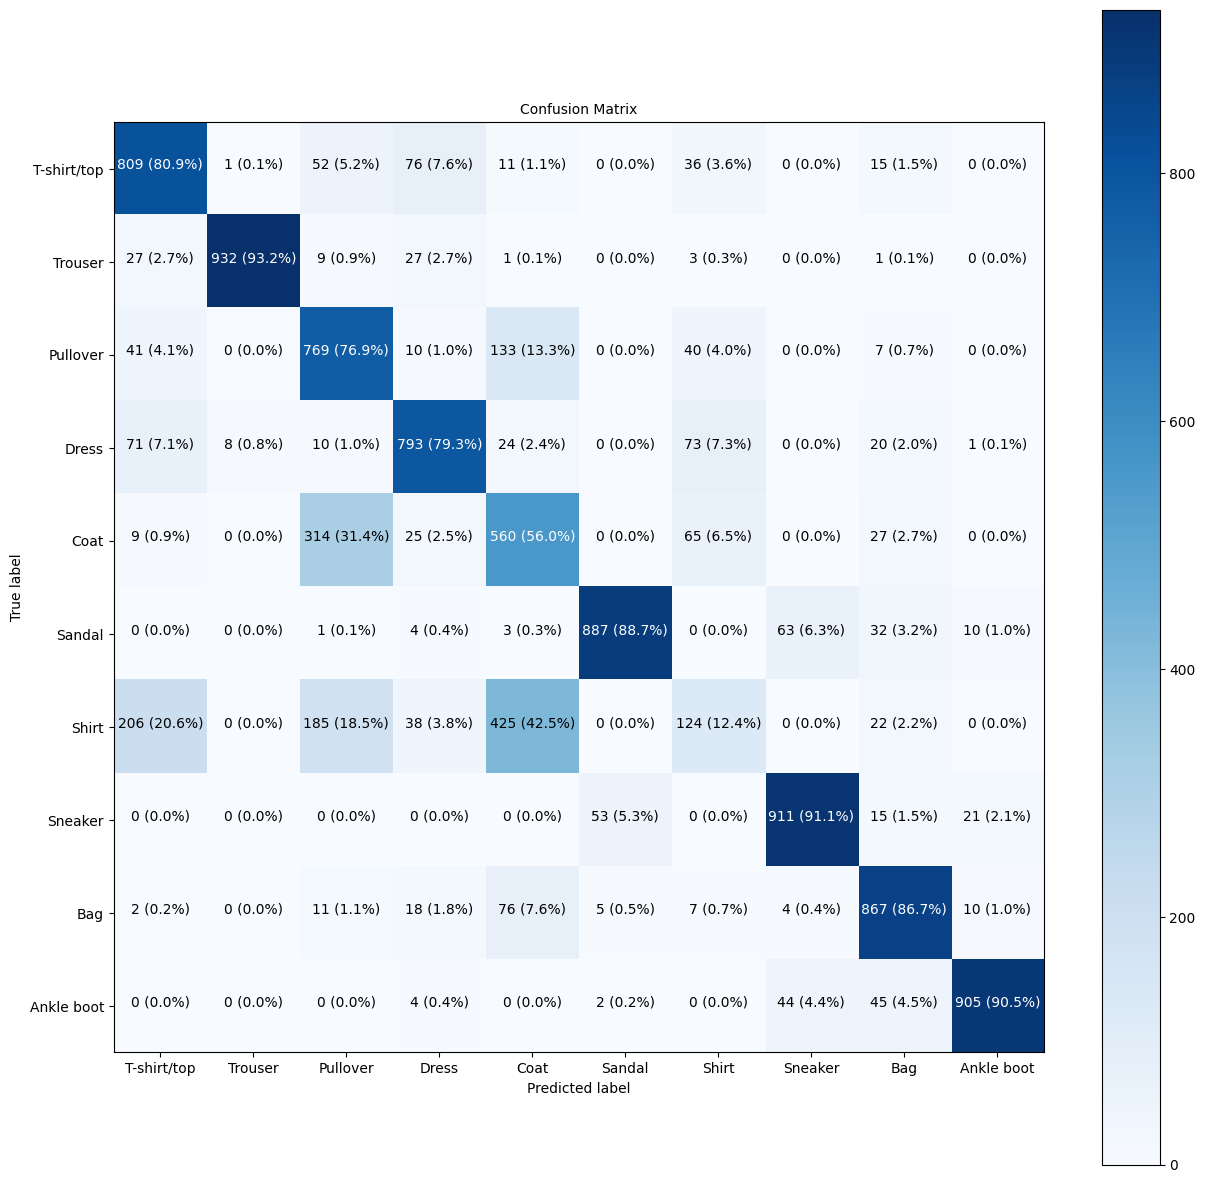

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

# visuvalizing random model predictions

In [ ]:
import random

def plot_random_image(model,images,true_labels,classes):
  #set up random integer
  i=random.randint(0, len(images))

  #create predictions and targets
  target_image= images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28))
  pred_label= classes[pred_probs.argmax()]
  true_label= classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color= 'green'
  else:
    color='red'

  #add xlabel information (prediction/true labels)
  plt.xlabel('pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                    color=color) # set green or red if prediction is right or wrong

1/1 [==============================] - 0s 21ms/step


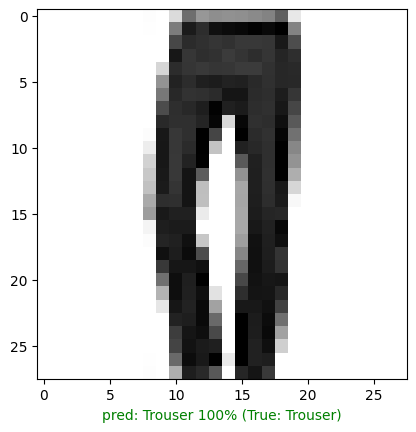

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_10,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

# what patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_10.layers

In [ ]:
# Extract a particular layer
model_10.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_10.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.090924  ,  0.0548468 , -0.00317153,  0.03911379],
        [ 0.4512716 , -0.08256987,  0.496876  ,  0.03837436],
        [-0.09069176, -0.8670238 ,  0.38006228,  0.0076174 ],
        ...,
        [ 0.11719189, -0.3992421 ,  0.2644082 ,  0.37598026],
        [ 0.36801466, -0.03736147, -0.08449356, -0.28452572],
        [ 0.60046625, -0.2658216 , -0.4162708 , -0.40845808]],
       dtype=float32),
 (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([2.2580462, 2.759137 , 1.5644085, 2.0210333], dtype=float32), (4,))

* weights are added to each data point(784) in each neuron in dense layer.

* weights are randomly initialized at starting of the process.

* But biases are added only one for each neuron.

* biases are initialized with zeros

In [ ]:
# Can now calculate the number of paramters in our model
model_10.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


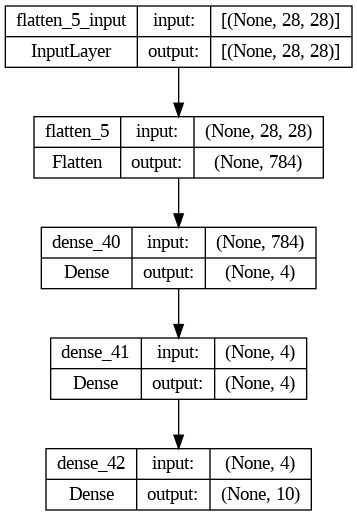

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_10, show_shapes=True)

# How a model learns (in brief)
Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called **backpropagation**.

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.

# Exercises 🛠

 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

  5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

   6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

   7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

# Extra curriculum 📖

* Watch 3Blue1Brown's neural networks video 2: Gradient descent, how neural networks learn. After you're done, write 100 words about what you've learned.

* If you haven't already, watch video 1: But what is a Neural Network?. Note the activation function they talk about at the end.

* Watch MIT's introduction to deep learning lecture 1 (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.

* Spend 1-hour reading Michael Nielsen's Neural Networks and Deep Learning book.

* Read the ML-Glossary documentation on activation functions. Which one is your favourite?

* After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".

# Excercise


In [ ]:
# replicate the neural network from the tensorplayground (classification)
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x ,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42 )


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#split train and test data
x_train=x[:800]
y_train=y[:800]
x_test=x[800:]
y_test=y[800:]

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

so our dataset have  two features and binary output variable as mentioned in the excercise

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#create model
model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(6,tf.keras.activations.relu),
    tf.keras.layers.Dense(6,tf.keras.activations.relu),
    tf.keras.layers.Dense(6,tf.keras.activations.relu),
    tf.keras.layers.Dense(6,tf.keras.activations.relu),
    tf.keras.layers.Dense(6,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.relu)
])

#compile model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=["accuracy"])
#fit model
history=model_11.fit(x_train,
             y_train,
             epochs=400,verbose=0)



In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 2)                   6         
                                                                 
 dense_1 (Dense)             (32, 6)                   18        
                                                                 
 dense_2 (Dense)             (32, 6)                   42        
                                                                 
 dense_3 (Dense)             (32, 6)                   42        
                                                                 
 dense_4 (Dense)             (32, 6)                   42        
                                                                 
 dense_5 (Dense)             (32, 6)                   42        
                                                                 
 dense_6 (Dense)             (32, 1)                   7

<Axes: >

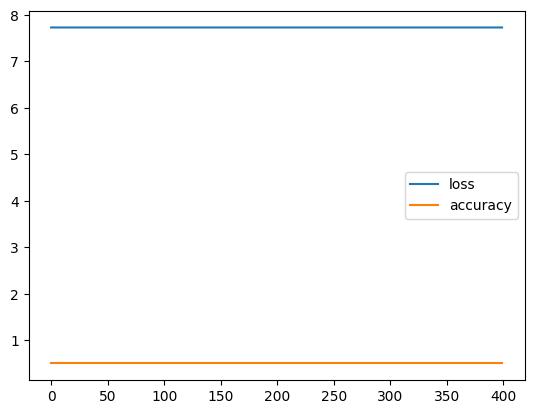

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
from sklearn.datasets import make_moons
# make 1000 examples
n_samples = 1000

# create circles
x ,y = make_moons(n_samples,
                    noise=0.03,
                    random_state=42 )


In [ ]:
x,y

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        ...,
        [ 1.65391483, -0.29179795],
        [-0.9341017 ,  0.35358221],
        [ 0.7968358 ,  0.60423662]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

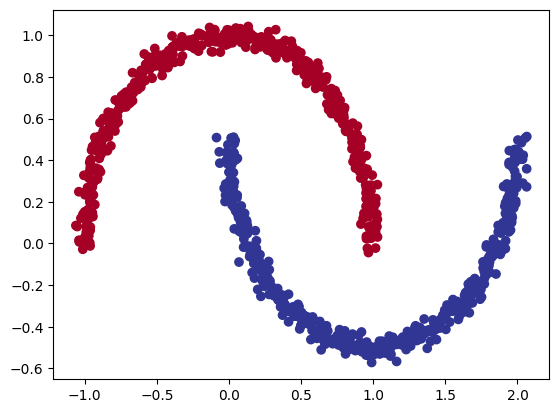

In [ ]:
# visualize with a plot
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD() ,
             metrics=['accuracy'])

model_12.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.2220 - accuracy: 0.7630
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.8850
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.8870
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.8840
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.8880


the model was fit over 85% accuracy